## SGLD, constant stepsize, one sample
do not CV

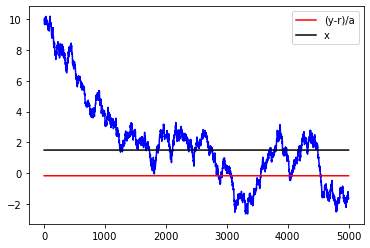

Posterior mean: 0.9669
Posterior std: 1.5919


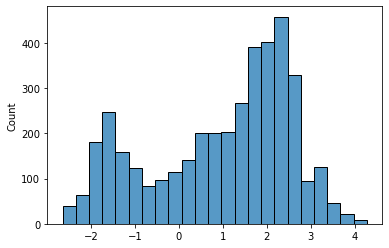

In [1]:
"""
Stochastic Gradient Langevin Dynamics (Welling, Teh, ICML 2011)
---------------------------------------------------------------
Example of simple SGLD sampling the posterior of param of 1D linear regression.
"""
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


a = 1.2
x = 1.5
r = 0.2

# Noisy data
y = np.random.poisson(a*x+r,1)  # Simple linear sample from POISSON noise

eps = 0.001  # step size
sigma_b = 10  # variance factor relating the SGD and the Langevin dynamics phase
x_t = 10   # initial param

beta = 1

N_iter = 5000

samples = np.zeros(N_iter)
samples[0] = x_t

for t in range(1, N_iter):
    # print(x_t)

    eps_t = eps  # constant learning rate : converge super quickly
    # eps_t = eps / t  # Annealed learning rate : do not converge ...
    eta = np.random.normal(0, np.sqrt(eps * sigma_b))  # GAUSSIAN Noise
    # eta = 0 # no noise
    
    grad_logprior = -beta * x_t  # prior = N(w | 0, 1) # with prior : CV better to x=1.5, depending on beta as we do not have lots of data
    # grad_logprior = 0 # without prior : CV to (y-r)/a
    # whole dataset
    grad_POSITIVE_loglik = a*y[0] / (a*x_t+r) - a  # lik = poisson
    grad_logpost = grad_logprior + grad_POSITIVE_loglik  # whole dataset

    delta = eps_t / 2 * grad_logpost + eta
    x_t += delta

    samples[t] = x_t

burnin = 1000  # burn-in samples to be discarded

plt.plot(np.arange(1,N_iter+1),samples,color='blue')
plt.plot(np.arange(1,N_iter+1),(y-r)/a*np.ones(N_iter),color='red',label='(y-r)/a')
plt.plot(np.arange(1,N_iter+1),x*np.ones(N_iter),color='black',label='x')
plt.legend()

plt.show()

samples = samples[burnin:]

x_hat = np.mean(samples)

print('Posterior mean: {:.4f}'.format(x_hat))
print('Posterior std: {:.4f}'.format(np.std(samples)))

sns.histplot(samples)
plt.show()

## Gradient descent, constant stepsize, one sample
CV to (y-r)/a if only likelihood, between (y-r)/a and x if prior

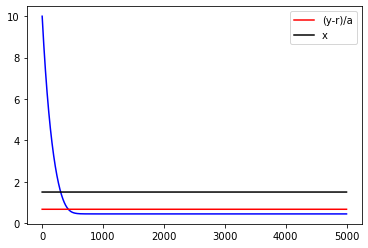

x hat: 0.4423


In [2]:
"""
Stochastic Gradient Langevin Dynamics (Welling, Teh, ICML 2011)
---------------------------------------------------------------
Example of simple SGLD sampling the posterior of param of 1D linear regression.
"""
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


a = 1.2
x = 1.5
r = 0.2

# Noisy data
y = np.random.poisson(a*x+r,1)  # Simple linear sample from POISSON noise

eps = 0.01  # step size
x_t = 10   # initial param

beta = 1

N_iter = 5000

samples = np.zeros(N_iter)
samples[0] = x_t

for t in range(1, N_iter):
    # print(x_t)

    eps_t = eps  # constant learning rate : converge super quickly
    # eps_t = eps / t  # Annealed learning rate : do not converge ...
    # eta = np.random.normal(0, np.sqrt(eps_t))  # GAUSSIAN Noise
    eta = 0 # no noise
    
    grad_logprior = -beta * x_t  # prior = N(w | 0, 1) # with prior : CV better to x=1.5, depending on beta as we do not have lots of data
    # grad_logprior = 0 # without prior : CV to (y-r)/a
    # whole dataset
    grad_POSITIVE_loglik = a*y[0] / (a*x_t+r) - a  # lik = poisson
    grad_logpost = grad_logprior + grad_POSITIVE_loglik  # whole dataset

    delta = eps_t / 2 * grad_logpost + eta
    x_t += delta

    samples[t] = x_t

plt.plot(np.arange(1,N_iter+1),samples,color='blue')
plt.plot(np.arange(1,N_iter+1),(y-r)/a*np.ones(N_iter),color='red',label='(y-r)/a')
plt.plot(np.arange(1,N_iter+1),x*np.ones(N_iter),color='black',label='x')
plt.legend()

plt.show()

x_hat = samples[-1]
print('x hat: {:.4f}'.format(x_hat))

## Gradient descent, constant stepsize, N samples
CV to x if only likelihood, between (y-r)/a and x if prior

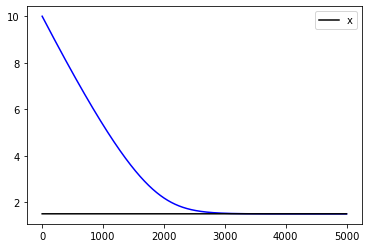

x hat: 1.4950


In [3]:
"""
Stochastic Gradient Langevin Dynamics (Welling, Teh, ICML 2011)
---------------------------------------------------------------
Example of simple SGLD sampling the posterior of param of 1D linear regression.
"""
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


a = 1.2
x = 1.5
r = 0.2

N=1000
n=50

# Noisy data
y = np.random.poisson(a*x+r,N)  # Simple linear sample from POISSON noise

eps = 0.01  # step size
x_t = 10   # initial param

beta = 0

N_iter = 5000

samples = np.zeros(N_iter)
samples[0] = x_t

for t in range(1, N_iter):
    # print(x_t)

    eps_t = eps  # constant learning rate : converge super quickly
    # eps_t = eps / t  # Annealed learning rate : do not converge ...
    eta = np.random.normal(0, np.sqrt(eps_t))  # GAUSSIAN Noise
    eta = 0 # no noise
    
    grad_logprior = -beta * x_t  # prior = N(w | 0, 1) # with prior : CV better to x=1.5, depending on beta as we do not have lots of data
    # grad_logprior = 0 # without prior : CV to (y-r)/a
    # whole dataset
    grad_POSITIVE_loglik = a*np.mean(y) / (a*x_t+r) - a  # lik = poisson
    grad_logpost = grad_logprior + grad_POSITIVE_loglik  # whole dataset

    delta = eps_t / 2 * grad_logpost + eta
    x_t += delta

    samples[t] = x_t

burnin = 0  # burn-in samples to be discarded

plt.plot(np.arange(1,N_iter+1),samples,color='blue')
# plt.plot(np.arange(1,N_iter+1),(y-r)/a*np.ones(N_iter),color='red',label='(y-r)/a')
plt.plot(np.arange(1,N_iter+1),x*np.ones(N_iter),color='black',label='x')
plt.legend()

plt.show()

x_hat = samples[-1]
print('x hat: {:.4f}'.format(x_hat))

## Gradient descent with preconditioner, constant stepsize, N samples
????? CV to x if only likelihood, between (y-r)/a and x if prior

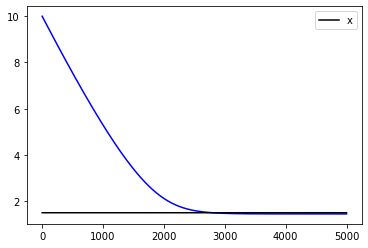

x hat: 1.4492


In [4]:
"""
Stochastic Gradient Langevin Dynamics (Welling, Teh, ICML 2011)
---------------------------------------------------------------
Example of simple SGLD sampling the posterior of param of 1D linear regression.
"""
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


a = 1.2
x = 1.5
r = 0.2

N=1000
n=50

# Noisy data
y = np.random.poisson(a*x+r,N)  # Simple linear sample from POISSON noise

eps = 0.01  # step size
x_t = 10   # initial param

beta = 0

N_iter = 5000

samples = np.zeros(N_iter)
samples[0] = x_t

for t in range(1, N_iter):
    # print(x_t)

    eps_t = eps  # constant learning rate : converge super quickly
    # eps_t = eps / t  # Annealed learning rate : do not converge ...
    eta = np.random.normal(0, np.sqrt(eps_t))  # GAUSSIAN Noise
    eta = 0 # no noise
    
    grad_logprior = -beta * x_t  # prior = N(w | 0, 1) # with prior : CV better to x=1.5, depending on beta as we do not have lots of data
    # grad_logprior = 0 # without prior : CV to (y-r)/a
    # whole dataset
    grad_POSITIVE_loglik = a*np.mean(y) / (a*x_t+r) - a  # lik = poisson
    grad_logpost = grad_logprior + grad_POSITIVE_loglik  # whole dataset

    precond = 1
    #precond = 1 / a # a few worse than without precond
    #precond = x_t / a # MLEM precond is great
    
    delta = precond * eps_t / 2 * grad_logpost + np.sqrt(precond) * eta
    x_t += delta

    samples[t] = x_t

burnin = 0  # burn-in samples to be discarded

plt.plot(np.arange(1,N_iter+1),samples,color='blue')
# plt.plot(np.arange(1,N_iter+1),(y-r)/a*np.ones(N_iter),color='red',label='(y-r)/a')
plt.plot(np.arange(1,N_iter+1),x*np.ones(N_iter),color='black',label='x')
plt.legend()

plt.show()

x_hat = samples[-1]
print('x hat: {:.4f}'.format(x_hat))

## SGLD, annealed stepsize, N samples
CV to x

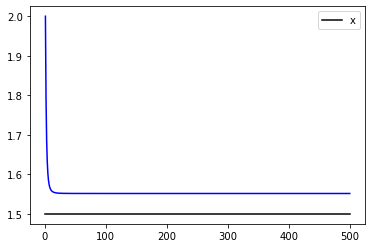

[1.5519709  1.5519414  1.55191548 1.55189262 1.55187239 1.55185443
 1.55183844 1.55182416 1.55181138 1.55179989 1.55178956 1.55178023
 1.55177179 1.55176415 1.5517572  1.55175088 1.55174511 1.55173985
 1.55173502 1.5517306  1.55172655 1.55172281 1.55171937 1.5517162
 1.55171327 1.55171056 1.55170804 1.55170571 1.55170355 1.55170154
 1.55169966 1.55169792 1.55169629 1.55169477 1.55169335 1.55169202
 1.55169077 1.5516896  1.5516885  1.55168747 1.5516865  1.55168559
 1.55168473 1.55168393 1.55168316 1.55168244 1.55168176 1.55168112
 1.55168051 1.55167994 1.55167939 1.55167887 1.55167838 1.55167792
 1.55167748 1.55167706 1.55167666 1.55167628 1.55167592 1.55167558
 1.55167525 1.55167494 1.55167464 1.55167435 1.55167408 1.55167382
 1.55167358 1.55167334 1.55167311 1.5516729  1.55167269 1.55167249
 1.5516723  1.55167212 1.55167195 1.55167178 1.55167162 1.55167146
 1.55167131 1.55167117 1.55167104 1.5516709  1.55167078 1.55167066
 1.55167054 1.55167043 1.55167032 1.55167021 1.55167011 1.55167

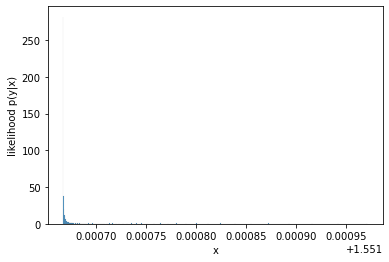

Posterior mean: 2.0620
Posterior std: 1.4353


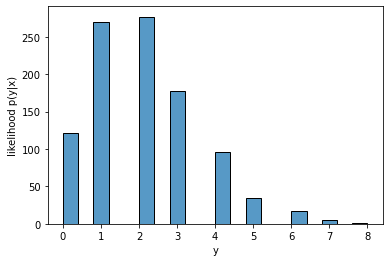

In [32]:
"""
Stochastic Gradient Langevin Dynamics (Welling, Teh, ICML 2011)
---------------------------------------------------------------
Example of simple SGLD sampling the posterior of param of 1D linear regression.
"""
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


a = 1.2
x = 1.5
r = 0.2

N=1000
n=50

# Noisy data
y = np.random.poisson(a*x+r,N)  # Simple linear sample from POISSON noise

eps = 0.01  # step size
x_t = 2   # initial param

beta = 0

N_iter = 500

samples = np.zeros(N_iter)
samples[0] = x_t

for t in range(1, N_iter):
    # print(x_t)

    if (t < N_iter / 1):
        eps_t = 2 * 1 / (0.2*t+1) # annealed learning rate
        # eps_t = 2 * 1 / (0.2*t+1)  # annealed learning rate BSREM
        # print(eps_t)
    else:
        eps_t = eps_t  # constant learning rate
    eta = np.random.normal(0, np.sqrt(eps_t))  # GAUSSIAN Noise
    eta = 0 # no noise
    
    grad_logprior = -beta * x_t  # prior = N(w | 0, 1) # with prior : CV better to x=1.5, depending on beta as we do not have lots of data
    # grad_logprior = 0 # without prior : CV to (y-r)/a
    # whole dataset
    grad_POSITIVE_loglik = a*np.mean(y) / (a*x_t+r) - a  # lik = poisson
    grad_logpost = grad_logprior + grad_POSITIVE_loglik  # whole dataset

    precond = 1
    #precond = 1 / a # a few worse than without precond
    #precond = x_t / a # MLEM precond is great
    
    delta = precond * eps_t / 2 * grad_logpost + np.sqrt(np.abs(precond)) * eta
    x_t += delta
    
    if (x_t < 0):
        x_t = 0

    samples[t] = x_t

burnin = 30  # burn-in samples to be discarded

plt.plot(np.arange(1,N_iter+1),samples,color='blue')
# plt.plot(np.arange(1,N_iter+1),(y-r)/a*np.ones(N_iter),color='red',label='(y-r)/a')
plt.plot(np.arange(1,N_iter+1),x*np.ones(N_iter),color='black',label='x')
plt.legend()

plt.show()

samples = samples[burnin:]

x_hat = np.mean(samples)

print('Posterior mean: {:.4f}'.format(x_hat))
print('Posterior std: {:.4f}'.format(np.std(samples)))

sns.histplot(samples)
plt.xlabel('x')
plt.ylabel('likelihood p(y|x)')
plt.show()

# true Poisson distribution (likelihood)

print('Posterior mean: {:.4f}'.format(np.mean(y)))
print('Posterior std: {:.4f}'.format(np.std(y)))

sns.histplot(y)
plt.xlabel('y')
plt.ylabel('likelihood p(y|x)')
plt.show()

## SGLD, linear regression with gaussian noise, annealed stepsize, N samples

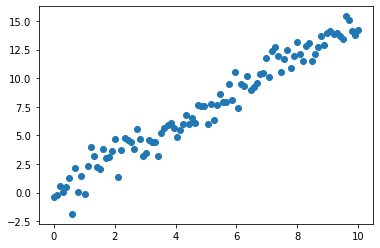

Posterior mean: 1.4960
Posterior std: 0.0085


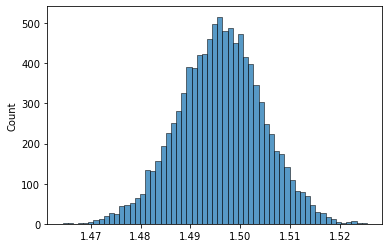

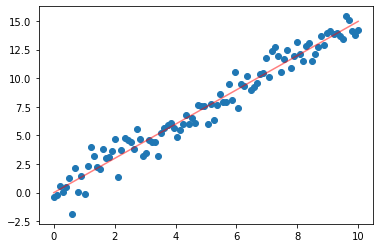

In [6]:
"""
Stochastic Gradient Langevin Dynamics (Welling, Teh, ICML 2011)
---------------------------------------------------------------
Example of simple SGLD sampling the posterior of param of 1D linear regression.
"""
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


N = 100
n = 50  # minibatch size
true_theta = 1.5

# Noisy data
X = np.linspace(0, 10, num=N)
y = true_theta * X + np.random.randn(N)  # Simple linear regression with GAUSSIAN noise
# y = true_theta * X + np.random.uniform(-np.sqrt(3),np.sqrt(3),N)  # Simple linear regression with UNIFORM noise
# y = true_theta * X + np.random.poisson(1,N)  # Simple linear regression with POISSON noise
plt.scatter(X, y)
plt.show()

eps = 0.1  # step size
theta = -60   # initial param

lambda_sigma_2 = 30

N_iter = 20000

samples = np.zeros(N_iter)
samples[0] = theta

for t in range(1, N_iter):
    # print(theta)
    mb_idxs = np.random.randint(0, N, size=n)
    x_mb, y_mb = X[mb_idxs], y[mb_idxs]

    eps_t = eps / t  # Annealed learning rate
    eta = np.random.normal(0, np.sqrt(eps_t))  # GAUSSIAN Noise
    # eta = np.random.uniform(-np.sqrt(3*eps_t),np.sqrt(3*eps_t))  # UNIFORM Noise
    # eta = 0 # no noise
    
    grad_logprior = theta  # prior = N(w | 0, 1)
    # subset
    # grad_loglik = np.sum(y_mb - theta*x_mb)  # lik = N(y | wx, 1)
    # grad_logpost = grad_logprior + N/n * grad_loglik  # N/n: scale correction
    # whole dataset
    grad_loglik = np.sum(y - theta*X)  # lik = N(y | wx, 1)
    grad_logpost = grad_logprior + lambda_sigma_2 * grad_loglik  # whole dataset

    delta = eps_t/2 * grad_logpost + eta
    theta = theta + delta

    samples[t] = theta

burnin = 10000  # burn-in samples to be discarded
samples = samples[burnin:]

theta_expected = np.mean(samples)

print('Posterior mean: {:.4f}'.format(theta_expected))
print('Posterior std: {:.4f}'.format(np.std(samples)))

sns.histplot(samples)
plt.show()

y_pred = theta_expected*X

plt.scatter(X, y)
plt.plot(X, y_pred, color='red', alpha=0.5)
plt.show()

## SGLD, linear regression with gaussian noise, annealed stepsize, N samples, step sizes to weight the samples (only useful to compute expectation or also to have posterior distribution ?)

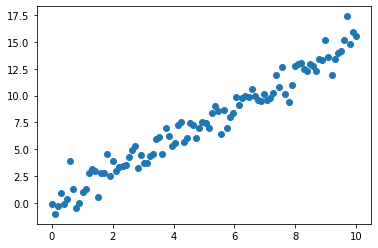

Posterior mean: 1.4982
Posterior std: 0.0082


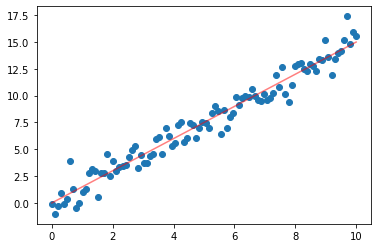

In [7]:
"""
Stochastic Gradient Langevin Dynamics (Welling, Teh, ICML 2011)
---------------------------------------------------------------
Example of simple SGLD sampling the posterior of param of 1D linear regression.
"""
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


N = 100
n = 50  # minibatch size
true_theta = 1.5

# Noisy data
X = np.linspace(0, 10, num=N)
y = true_theta * X + np.random.randn(N)  # Simple linear regression with GAUSSIAN noise
# y = true_theta * X + np.random.uniform(-np.sqrt(3),np.sqrt(3),N)  # Simple linear regression with UNIFORM noise
# y = true_theta * X + np.random.poisson(1,N)  # Simple linear regression with POISSON noise
plt.scatter(X, y)
plt.show()

N_iter = 20000

t_list = np.arange(1, N_iter)
eps_list = 0.1 / t_list  # step sizes
theta = -60   # initial param

lambda_sigma_2 = 30

samples = np.zeros(N_iter)
samples[0] = theta

for t in t_list:
    # print(theta)
    mb_idxs = np.random.randint(0, N, size=n)
    x_mb, y_mb = X[mb_idxs], y[mb_idxs]

    eps_t = eps_list[t-1]  # Annealed learning rate
    eta = np.random.normal(0, np.sqrt(eps_t))  # GAUSSIAN Noise
    # eta = np.random.uniform(-np.sqrt(3*eps_t),np.sqrt(3*eps_t))  # UNIFORM Noise
    # eta = 0 # no noise
    
    grad_logprior = theta  # prior = N(w | 0, 1)
    # subset
    # grad_loglik = np.sum(y_mb - theta*x_mb)  # lik = N(y | wx, 1)
    # grad_logpost = grad_logprior + N/n * grad_loglik  # N/n: scale correction
    # whole dataset
    grad_loglik = np.sum(y - theta*X)  # lik = N(y | wx, 1)
    grad_logpost = grad_logprior + lambda_sigma_2 * grad_loglik  # whole dataset

    delta = eps_t/2 * grad_logpost + eta
    theta = theta + delta

    samples[t] = theta

burnin = 10000  # burn-in samples to be discarded
samples = samples[burnin:]

theta_expected = np.mean(samples)

print('Posterior mean: {:.4f}'.format(theta_expected))
print('Posterior std: {:.4f}'.format(np.std(samples)))

# sns.distplot(samples,hist_kws={'weights': eps_list[burnin-1:]})
plt.show()

y_pred = theta_expected*X

plt.scatter(X, y)
plt.plot(X, y_pred, color='red', alpha=0.5)
plt.show()

## SGLD, linear regression y=Ax+ b +noise with gaussian noise, annealed stepsize, N samples

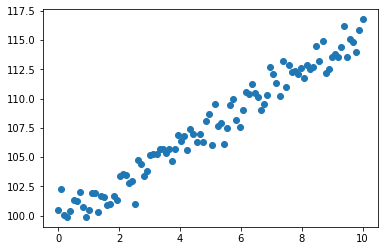

Posterior mean: 1.5224
Posterior std: 0.0084


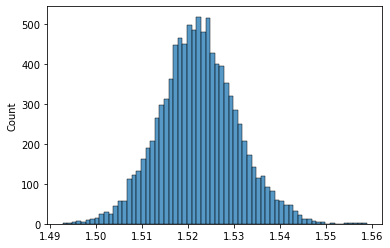

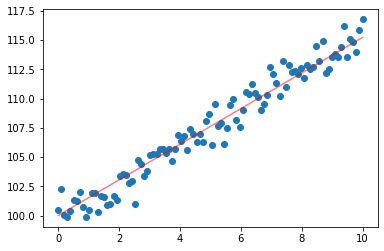

In [8]:
"""
Stochastic Gradient Langevin Dynamics (Welling, Teh, ICML 2011)
---------------------------------------------------------------
Example of simple SGLD sampling the posterior of param of 1D linear regression.
"""
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


N = 100
n = 50  # minibatch size
true_theta = 1.5

# Noisy data
X = np.linspace(0, 10, num=N)
b = 100*np.ones_like(X)
y = true_theta * X + b + np.random.randn(N)  # Simple linear regression with GAUSSIAN noise
plt.scatter(X, y)
plt.show()

eps = 0.1  # step size
theta = -60   # initial param

lambda_sigma_2 = 30

N_iter = 20000

samples = np.zeros(N_iter)
samples[0] = theta

for t in range(1, N_iter):
    # print(theta)
    mb_idxs = np.random.randint(0, N, size=n)
    x_mb, y_mb = X[mb_idxs], y[mb_idxs]

    eps_t = eps / t  # Annealed learning rate
    eta = np.random.normal(0, np.sqrt(eps_t))  # GAUSSIAN Noise
    # eta = np.random.uniform(-np.sqrt(3*eps_t),np.sqrt(3*eps_t))  # UNIFORM Noise
    # eta = 0 # no noise
    
    grad_logprior = theta  # prior = N(w | 0, 1)
    # subset
    # grad_loglik = np.sum(y_mb - theta*x_mb)  # lik = N(y | wx, 1)
    # grad_logpost = grad_logprior + N/n * grad_loglik  # N/n: scale correction
    # whole dataset
    grad_loglik = np.sum(y - theta*X - b)  # lik = N(y | wx, 1)
    grad_logpost = grad_logprior + lambda_sigma_2 * grad_loglik  # whole dataset

    delta = eps_t/2 * grad_logpost + eta
    theta = theta + delta

    samples[t] = theta

burnin = 10000  # burn-in samples to be discarded
samples = samples[burnin:]

theta_expected = np.mean(samples)

print('Posterior mean: {:.4f}'.format(theta_expected))
print('Posterior std: {:.4f}'.format(np.std(samples)))

sns.histplot(samples)
plt.show()

y_pred = theta_expected*X+b

plt.scatter(X, y)
plt.plot(X, y_pred, color='red', alpha=0.5)
plt.show()